# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import tifffile as tiff

## Load training and label

In [2]:
# DATOS_train
datos_train = pd.read_csv("data/DATOS_train.csv")

In [3]:
path_feats = "data/train_features/content/train_features/"
path_labels = "data/train_labels/content/train_labels/"

In [4]:
feats = []
labels = []
for n in range(len(datos_train)):
    path_feat = datos_train.iloc[n].feature_image
    path_label = datos_train.iloc[n].label_image
    feat = tiff.imread(path_feats + path_feat)
    label = tiff.imread(path_labels + path_label)
    
    feats.append(feat)
    labels.append(label)
    
feats = np.array(feats)
labels = np.array(labels)

In [5]:
feats.shape, labels.shape

((5317, 128, 128, 10), (5317, 128, 128))

In [6]:
feats.min(), feats.max()

(-3.4028235e+38, 1.0)

In [7]:
labels.min(), labels.max()

(0, 15)

In [8]:
from collections import Counter
Counter(labels.flatten())

Counter({4: 32841983,
         2: 26621292,
         0: 6274714,
         6: 290550,
         1: 4317735,
         5: 6097122,
         7: 10616479,
         15: 53853})

## Prepocess Features
Scale

In [57]:
np.min(feats[1][:, :, 1])

0.0785724

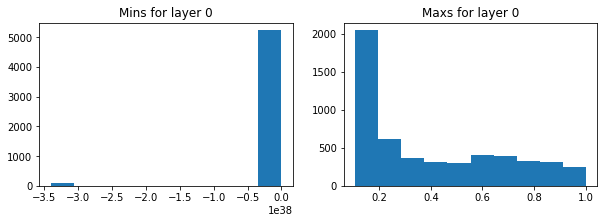

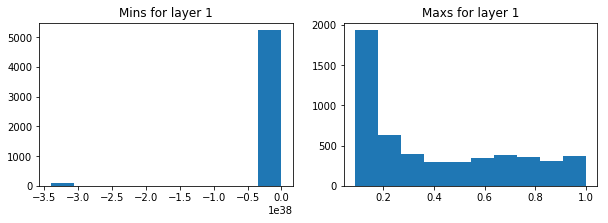

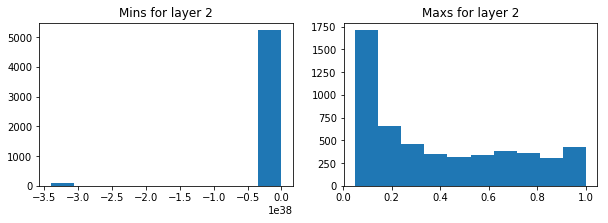

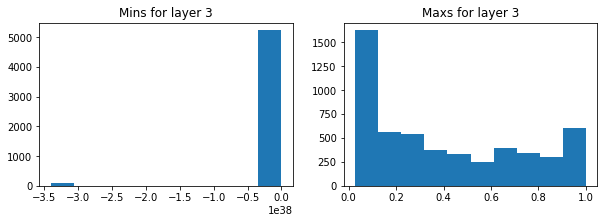

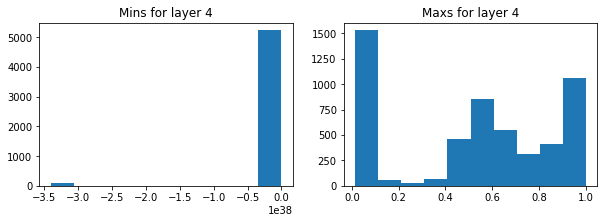

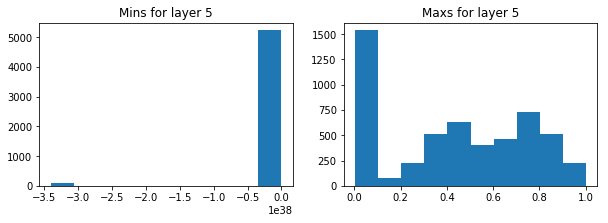

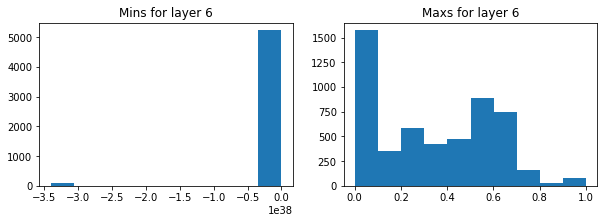

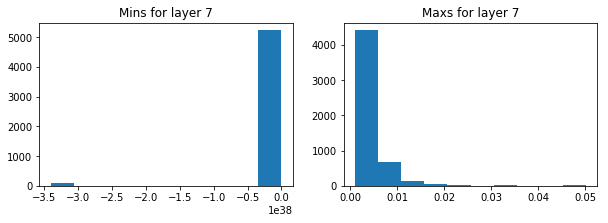

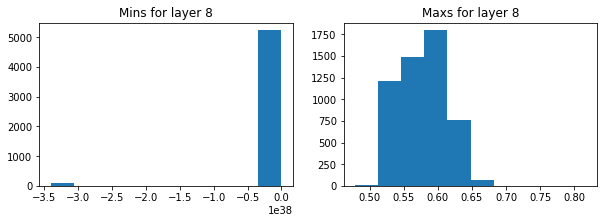

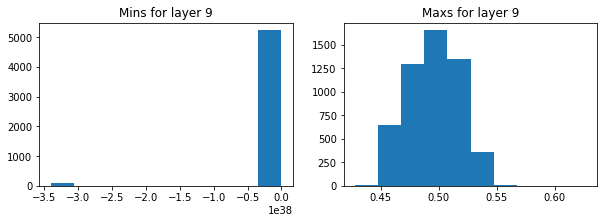

In [65]:
# distribution per layer

for i in range(10):
    mins = []
    maxs = []
    for j in range(feats.shape[0]):
        vals = feats[j][:, :, i].flatten()
        min_ = vals.min()
        max_ = vals.max()
    
        mins.append(min_)
        maxs.append(max_)

    f, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].hist(mins)
    ax[0].set_title(f'Mins for layer {i}')
    ax[1].hist(maxs)
    ax[1].set_title(f'Maxs for layer {i}')
    plt.show()
    
    

In [69]:
# which have minimum values < - 1?
outliers = []
for i in feats:
    if np.min(i) < -1:
        outliers.append(i)

In [70]:
len(outliers)

96

In [90]:
# we remove outliers
feats_final = []

for n in range(len(datos_train)):
    path_feat = datos_train.iloc[n].feature_image
    feat = tiff.imread(path_feats + path_feat)
    
    if feat.min() >= -1:
        feats_final.append(feat)
    
feats_final = np.array(feats_final)

In [91]:
feats_final.shape

(5221, 128, 128, 10)

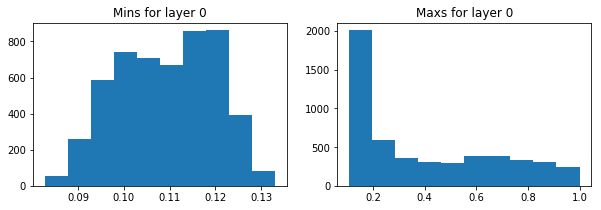

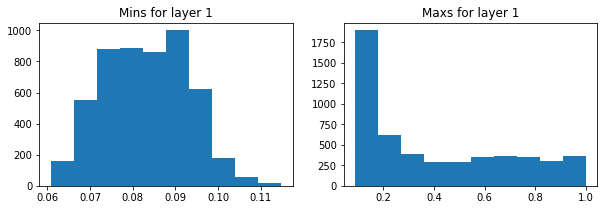

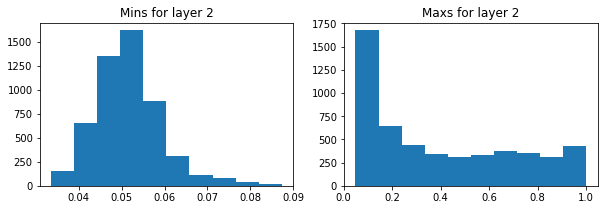

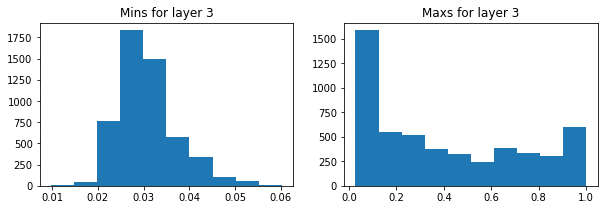

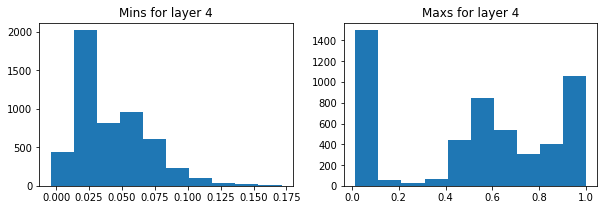

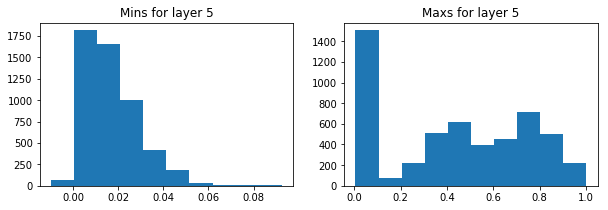

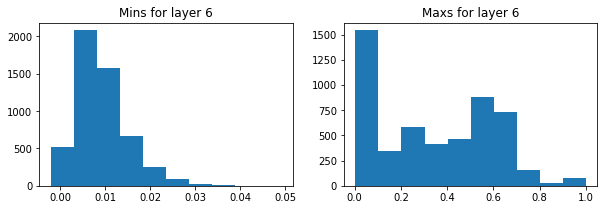

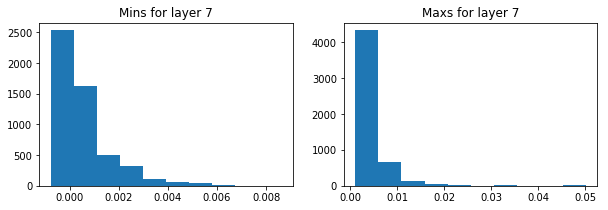

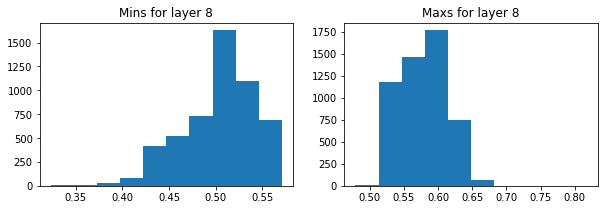

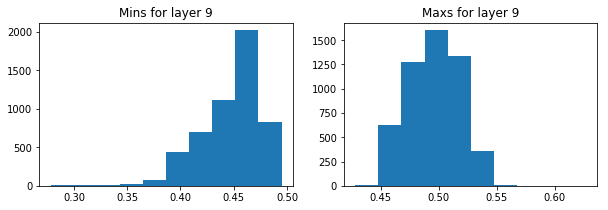

In [92]:
# distribution per layer

for i in range(10):
    mins = []
    maxs = []
    for j in range(feats_final.shape[0]):
        vals = feats_final[j][:, :, i].flatten()
        min_ = vals.min()
        max_ = vals.max()
    
        mins.append(min_)
        maxs.append(max_)

    f, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].hist(mins)
    ax[0].set_title(f'Mins for layer {i}')
    ax[1].hist(maxs)
    ax[1].set_title(f'Maxs for layer {i}')
    plt.show()
    
    

## Preprocess label (separate per class)
Optional. We split each prediction into a 128 X 128 X 8 tensor. Each of the 8 layers correspond to classes 0, 1, 2, 4, 5, 6, 7, 15.

In [9]:
sample_label = labels[3]
sample_label.shape

(128, 128)

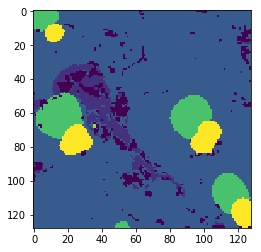

In [22]:
plt.imshow(sample_label)

In [20]:
def split_array(sample_label):
    new_array = []

    for i in [0, 1, 2, 4, 5, 6, 7, 15]:
        layer = sample_label==i
        layer = layer.astype(int)
        new_array.append(layer)
    new_array = np.array(new_array)
    
    return new_array

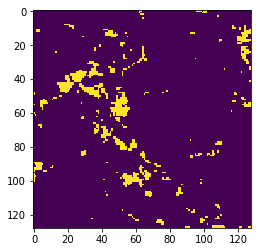

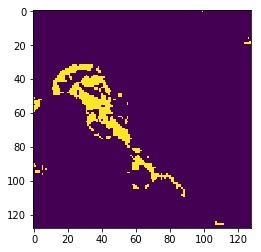

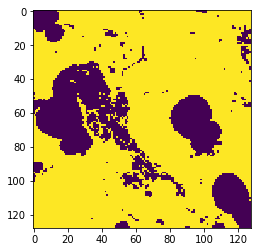

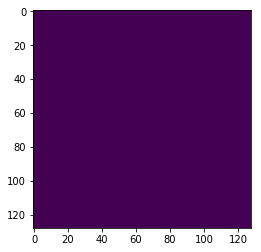

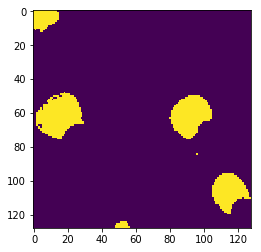

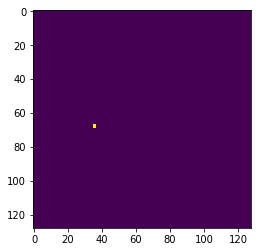

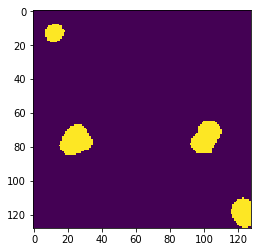

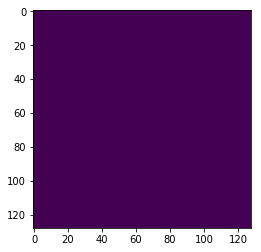

In [25]:
sample_split = split_array(sample_label)
for i in range(8):
    plt.imshow(sample_split[i])
    plt.show()

In [26]:
splits = np.array([split_array(i) for i in labels])

In [27]:
splits.shape

(5317, 8, 128, 128)

In [28]:
labels_final = splits

In [ ]:
feats_final.shape

# Model Definitions

### Standard U-Net

### U-Net with Adversarial Loss on Prediction Network

### WGANs

## Training and Cross Validation

## Test Prediction

## Submission File